# AU/GB - Customer A/B Test

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind_from_stats
%matplotlib inline

In [22]:
# DWH connection and group split
connection = 'connections.json'
query = 'm_education.sql'
df_dwh = dsutil.db.run_dwh_query_from_file(query, connection)
df_dwh.columns = ['test','country','locale','customer_id','segment','earliest_sent_week','earliest_sent_date','nps_score','channel','earliest_sent_hf_running_week','10w_revenue_excluding_vat_local_currency','10w_voucher_discount_amount_local_currency','10w_deliveries','10w_cancelled_weeks']

df_dwh.drop(['test','locale','earliest_sent_week','earliest_sent_date','channel','earliest_sent_hf_running_week'], axis=1)
df_dwh.drop_duplicates(subset='customer_id', keep="last")

df_au = df_dwh[df_dwh.country=='AU']
df_au_test = df_au[df_au.segment=='test']
df_au_control = df_au[df_au.segment=='control']

df_gb = df_dwh[df_dwh.country=='GB']
df_gb_test = df_gb[df_gb.segment=='test']
df_gb_control = df_gb[df_gb.segment=='control']

# Australia

## Average 10-week Net Revenue

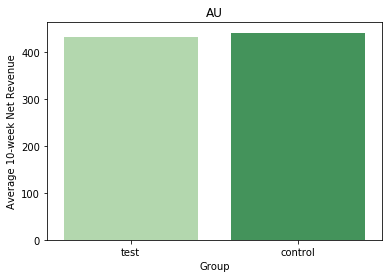

The difference in mean is -9.27.
With a p-value of 0.58 the difference between groups is NOT statistically significant.


In [23]:
# creating barchart
groupedvalues=df_au.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('10w_revenue_excluding_vat_local_currency').reset_index()
g = sns.barplot(x='segment',y='10w_revenue_excluding_vat_local_currency',data=groupedvalues, palette="Greens")
g.set(xlabel = "Group", ylabel = "Average 10-week Net Revenue", title = "AU")

# t-test
n_test = df_au_test['customer_id'].nunique()
mean_test = df_au_test['10w_revenue_excluding_vat_local_currency'].mean()
std_test = df_au_test['10w_revenue_excluding_vat_local_currency'].std()

n_control = df_au_control['customer_id'].nunique()
mean_control = df_au_control['10w_revenue_excluding_vat_local_currency'].mean()
std_control = df_au_control['10w_revenue_excluding_vat_local_currency'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


## Average 10-week Number of Deliveries

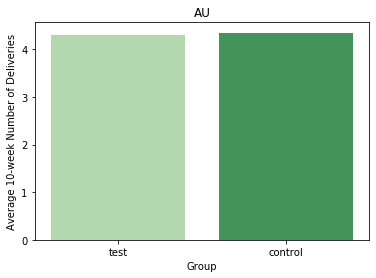

The difference in mean is -0.04.
With a p-value of 0.77 the difference between groups is NOT statistically significant.


In [24]:
# creating barchart
groupedvalues=df_au.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('10w_deliveries').reset_index()
g = sns.barplot(x='segment',y='10w_deliveries',data=groupedvalues, palette="Greens")
g.set(xlabel = "Group", ylabel = "Average 10-week Number of Deliveries", title = "AU")

# t-test
n_test = df_au_test['customer_id'].nunique()
mean_test = df_au_test['10w_deliveries'].mean()
std_test = df_au_test['10w_deliveries'].std()

n_control = df_au_control['customer_id'].nunique()
mean_control = df_au_control['10w_deliveries'].mean()
std_control = df_au_control['10w_deliveries'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


## Average 10-week Number of Cancelled Weeks

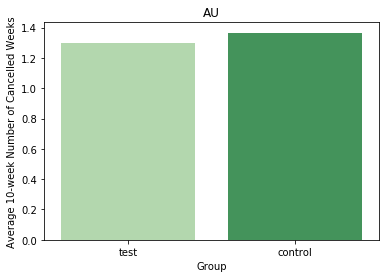

The difference in mean is -0.07.
With a p-value of 0.56 the difference between groups is NOT statistically significant.


In [25]:
# creating barchart
groupedvalues=df_au.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('10w_cancelled_weeks').reset_index()
g = sns.barplot(x='segment',y='10w_cancelled_weeks',data=groupedvalues, palette="Greens")
g.set(xlabel = "Group", ylabel = "Average 10-week Number of Cancelled Weeks", title = "AU")

# t-test
n_test = df_au_test['customer_id'].nunique()
mean_test = df_au_test['10w_cancelled_weeks'].mean()
std_test = df_au_test['10w_cancelled_weeks'].std()

n_control = df_au_control['customer_id'].nunique()
mean_control = df_au_control['10w_cancelled_weeks'].mean()
std_control = df_au_control['10w_cancelled_weeks'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


## Average NPS

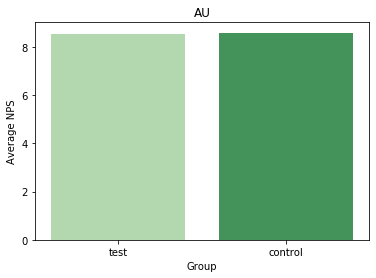

The difference in mean is -0.07.
With a p-value of 0.39 the difference between groups is NOT statistically significant.


In [26]:
# creating barchart
groupedvalues=df_au.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('nps_score').reset_index()
g = sns.barplot(x='segment',y='nps_score',data=groupedvalues, palette="Greens")
g.set(xlabel = "Group", ylabel = "Average NPS", title = "AU")

# t-test
n_test = df_au_test['customer_id'].nunique()
mean_test = df_au_test['nps_score'].mean()
std_test = df_au_test['nps_score'].std()

n_control = df_au_control['customer_id'].nunique()
mean_control = df_au_control['nps_score'].mean()
std_control = df_au_control['nps_score'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


# United Kingdom

## Average 10-week Net Revenue

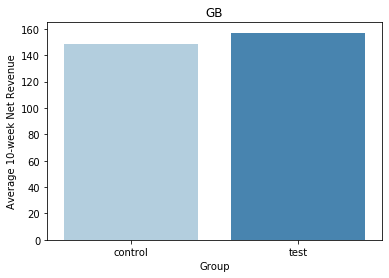

The difference in mean is 8.25.
With a p-value of 0.26 the difference between groups is NOT statistically significant.


In [27]:
# creating barchart
groupedvalues=df_gb.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('10w_revenue_excluding_vat_local_currency').reset_index()
g = sns.barplot(x='segment',y='10w_revenue_excluding_vat_local_currency',data=groupedvalues, palette="Blues")
g.set(xlabel = "Group", ylabel = "Average 10-week Net Revenue", title = "GB")

# t-test
n_test = df_gb_test['customer_id'].nunique()
mean_test = df_gb_test['10w_revenue_excluding_vat_local_currency'].mean()
std_test = df_gb_test['10w_revenue_excluding_vat_local_currency'].std()

n_control = df_gb_control['customer_id'].nunique()
mean_control = df_gb_control['10w_revenue_excluding_vat_local_currency'].mean()
std_control = df_gb_control['10w_revenue_excluding_vat_local_currency'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


## Average 10-week Number of Deliveries

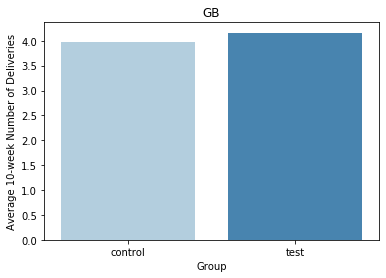

The difference in mean is 0.19.
With a p-value of 0.26 the difference between groups is NOT statistically significant.


In [28]:
# creating barchart
groupedvalues=df_gb.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('10w_deliveries').reset_index()
g = sns.barplot(x='segment',y='10w_deliveries',data=groupedvalues, palette="Blues")
g.set(xlabel = "Group", ylabel = "Average 10-week Number of Deliveries", title = "GB")

# t-test
n_test = df_gb_test['customer_id'].nunique()
mean_test = df_gb_test['10w_deliveries'].mean()
std_test = df_gb_test['10w_deliveries'].std()

n_control = df_gb_control['customer_id'].nunique()
mean_control = df_gb_control['10w_deliveries'].mean()
std_control = df_gb_control['10w_deliveries'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


## Average 10-week Number of Cancelled Weeks

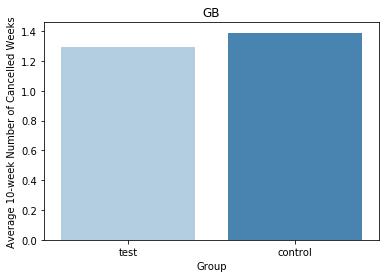

The difference in mean is -0.10.
With a p-value of 0.51 the difference between groups is NOT statistically significant.


In [29]:
# creating barchart
groupedvalues=df_gb.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('10w_cancelled_weeks').reset_index()
g = sns.barplot(x='segment',y='10w_cancelled_weeks',data=groupedvalues, palette="Blues")
g.set(xlabel = "Group", ylabel = "Average 10-week Number of Cancelled Weeks", title = "GB")

# t-test
n_test = df_gb_test['customer_id'].nunique()
mean_test = df_gb_test['10w_cancelled_weeks'].mean()
std_test = df_gb_test['10w_cancelled_weeks'].std()

n_control = df_gb_control['customer_id'].nunique()
mean_control = df_gb_control['10w_cancelled_weeks'].mean()
std_control = df_gb_control['10w_cancelled_weeks'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')


## Average NPS

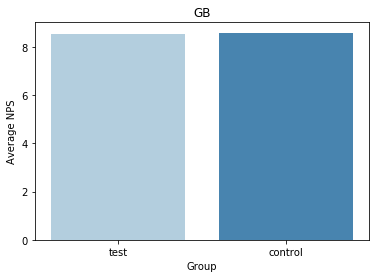

The difference in mean is -0.06.
With a p-value of 0.57 the difference between groups is NOT statistically significant.


In [30]:
# creating barchart
groupedvalues=df_gb.groupby('segment').mean().reset_index()
groupedvalues=groupedvalues.sort_values('nps_score').reset_index()
g = sns.barplot(x='segment',y='nps_score',data=groupedvalues, palette="Blues")
g.set(xlabel = "Group", ylabel = "Average NPS", title = "GB")

# t-test
n_test = df_gb_test['customer_id'].nunique()
mean_test = df_gb_test['nps_score'].mean()
std_test = df_gb_test['nps_score'].std()

n_control = df_gb_control['customer_id'].nunique()
mean_control = df_gb_control['nps_score'].mean()
std_control = df_gb_control['nps_score'].std()

tstat, pvalue = ttest_ind_from_stats(mean_test, std_test, n_test, mean_control, std_control, n_control)

# showing results
mean_diff = mean_test - mean_control

plt.show()
print('The difference in mean is '+str("%.2f" % mean_diff)+'.')
if pvalue < 0.05:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is statistically significant!')
else:
    print('With a p-value of '+str("%.2f" % pvalue)+' the difference between groups is NOT statistically significant.')
